# Exemplar Demonstration of TFNOS performance vs NBS T-statistic threshold using EEG data

In [68]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import time
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from tfnbs import eeg_utils, nbs_bct, nbs_utils, pairwise_tfns, get_tfce_score
from tfnbs import compute_permute_t_stat_diff, compute_t_stat_tfnos, compute_t_stat_tfnos_diffs, compute_diffs, compute_t_stat_diff

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading EEG data for comparision

In [48]:
path = "../datasets/eeg_dataframe_nansfilled.csv"

stable_fo = eeg_utils.read_from_eeg_dataframe(path, cond_prefix='fo')
stable_fz = eeg_utils.read_from_eeg_dataframe(path, cond_prefix='fz')

data_fo = eeg_utils.reshape_eeg_data(stable_fo.data, reshape_bands=True) # Reshaping Data into M*N*N format
data_fz = eeg_utils.reshape_eeg_data(stable_fz.data, reshape_bands=True)


### Comparing between groups 

In [53]:
diff_data = data_fo - data_fz
e = 0.4; h = 2

In [99]:
%%time
tf_scores = compute_t_stat_tfnos_diffs(diff_data, e, h, n=10)

Wall time: 30.2 ms


In [93]:
def plot_2_matrix(mat1, mat2, title1, title2, cmap = 'viridis'):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
    
    axes = axes.flatten()
    axes[0].imshow(mat1, cmap=cmap)  
    axes[0].set_title(title1); axes[0].axis('off')  
    
    im2 = axes[1].imshow(mat2, cmap=cmap)
    axes[1].set_title(title2); axes[1].axis('off')
    
    fig.tight_layout()
    plt.show()

def plot_4_matrix(mat1, mat2, title1, title2, 
                  mat3, mat4, title3, title4, 
                  cmap = 'viridis'):
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 14)) 
    
    axes = axes.flatten()
    axes[0].imshow(mat1, cmap=cmap)  
    axes[0].set_title(title1); axes[0].axis('off')  
    
    im2 = axes[1].imshow(mat2, cmap=cmap)
    axes[1].set_title(title2); axes[1].axis('off')

    im3 = axes[2].imshow(mat3, cmap=cmap)
    axes[2].set_title(title3); axes[2].axis('off')

    im4 = axes[3].imshow(mat4, cmap=cmap)
    axes[3].set_title(title4); axes[3].axis('off')
    
    fig.tight_layout()
    plt.show()

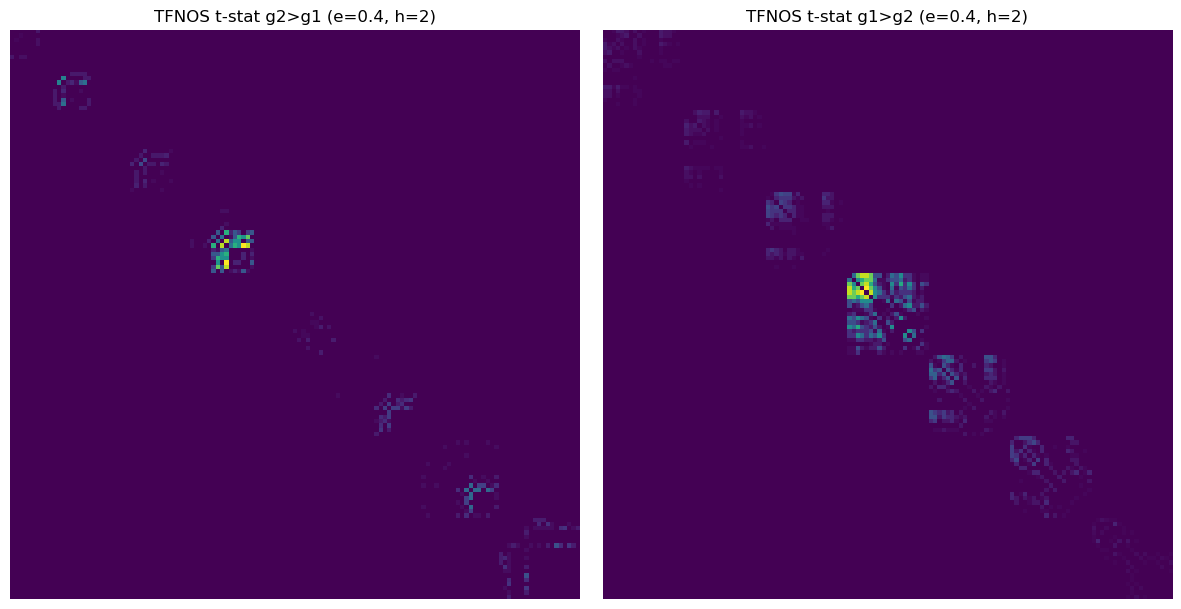

In [100]:
plot_2_matrix(tf_scores['g2>g1'], tf_scores['g1>g2'],
              f"TFNOS t-stat g2>g1 (e={e}, h={h})", f"TFNOS t-stat g1>g2 (e={e}, h={h})")

### Computing NBS approach using thresholds = [2.1, 2.75]

In [86]:
%%time
p_vals, _, _ = nbs_bct(data_fo, data_fz, threshold=2.1, paired=True, random_state=0)

Wall time: 6.01 s


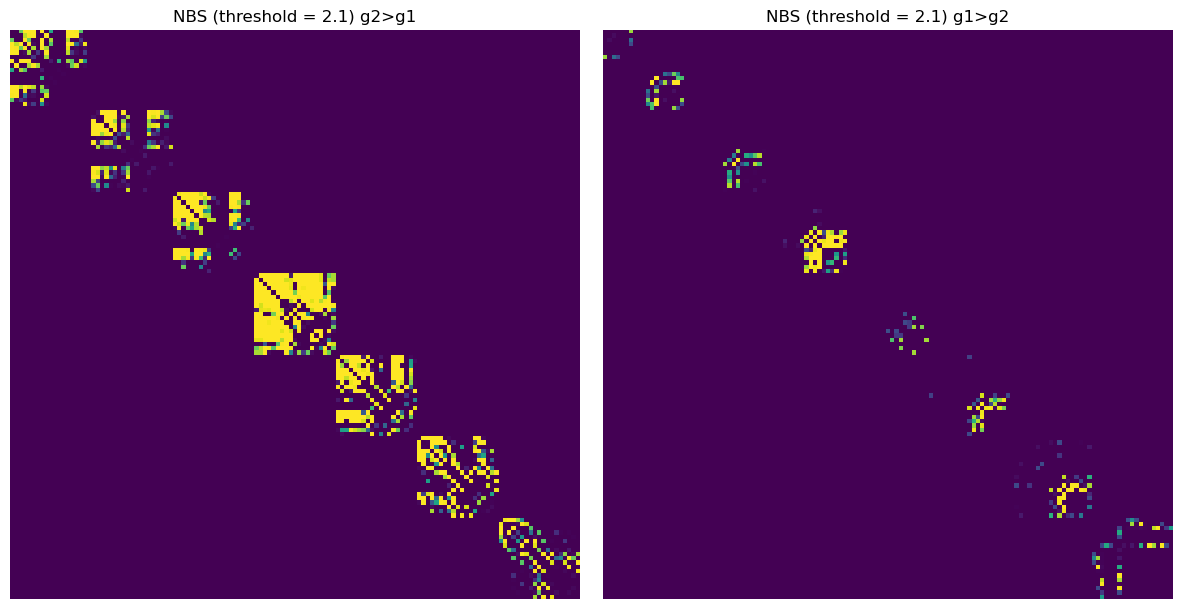

In [87]:
plot_2_matrix(-p_vals['g2>g1'], -p_vals['g1>g2'],
              f"NBS (threshold = 2.1) g2>g1", f"NBS (threshold = 2.1) g1>g2")

In [88]:
%%time
p_vals, _, _ = nbs_bct(data_fo, data_fz, threshold=2.75, paired=True, random_state=0)

Wall time: 6.13 s


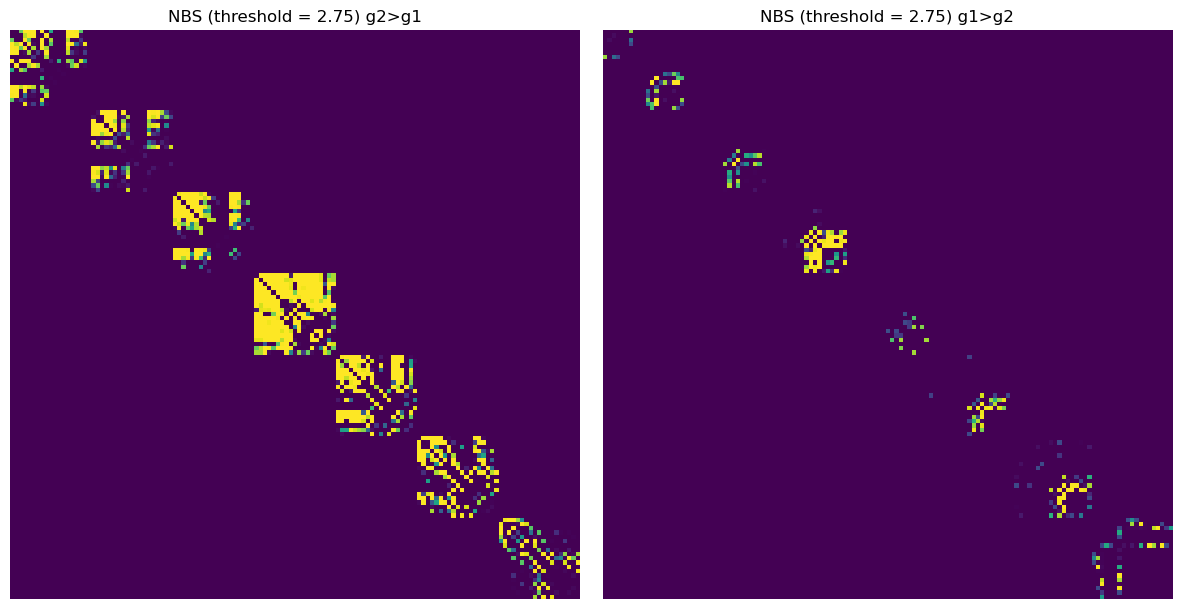

In [89]:
plot_2_matrix(-p_vals['g2>g1'], -p_vals['g1>g2'],
              f"NBS (threshold = 2.75) g2>g1", f"NBS (threshold = 2.75) g1>g2")

---------

----------